# E-Commerce Analysis

## Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Import the dataset

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/DELL/Downloads/Cleaned Data.csv", encoding="latin1")


## Preview the dataset

In [3]:
print(df)

       InvoiceNo InvoiceDate  InvoiceTime  \
0         536365   1/12/2010   8:26:00 AM   
1         536365   1/12/2010   8:26:00 AM   
2         536365   1/12/2010   8:26:00 AM   
3         536365   1/12/2010   8:26:00 AM   
4         536365   1/12/2010   8:26:00 AM   
...          ...         ...          ...   
244462    558533  30-06-2011  11:49:00 AM   
244463    558533  30-06-2011  11:49:00 AM   
244464    558533  30-06-2011  11:49:00 AM   
244465    558533  30-06-2011  11:49:00 AM   
244466    558533  30-06-2011  11:49:00 AM   

                                Description  Quantity  UnitPrice  TotalSale  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6       2.55      15.30   
1                       WHITE METAL LANTERN         6       3.39      20.34   
2            CREAM CUPID HEARTS COAT HANGER         8       2.75      22.00   
3       KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39      20.34   
4            RED WOOLLY HOTTIE WHITE HEART.         6       3.39

## Fix column names to avoid errors

In [4]:
# Fix column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

## Print the column names to avoid errors later on in the code

In [5]:
print(df.columns)

Index(['invoiceno', 'invoicedate', 'invoicetime', 'description', 'quantity',
       'unitprice', 'totalsale', 'price_satus', 'customerid', 'customer__type',
       'country', 'inovoce_month'],
      dtype='object')


## Perform data cleaning to ensure data integrity

In [6]:
# Fix date
df["invoicedate"] = pd.to_datetime(
    df["invoicedate"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)

In [7]:
df["invoicedate"].isna().sum()


0

## Create derived fields, useful for sql exportation

In [8]:
df["year"] = df["invoicedate"].dt.year
df["month"] = df["invoicedate"].dt.month
df["month_name"] = df["invoicedate"].dt.month_name()


In [22]:
cleaned_data = pd.read_csv("cleaned_retail_dataset.csv")
print(cleaned_data)

       invoiceno invoicedate  invoicetime  \
0         536365  2010-12-01   8:26:00 AM   
1         536365  2010-12-01   8:26:00 AM   
2         536365  2010-12-01   8:26:00 AM   
3         536365  2010-12-01   8:26:00 AM   
4         536365  2010-12-01   8:26:00 AM   
...          ...         ...          ...   
244462    558533  2011-06-30  11:49:00 AM   
244463    558533  2011-06-30  11:49:00 AM   
244464    558533  2011-06-30  11:49:00 AM   
244465    558533  2011-06-30  11:49:00 AM   
244466    558533  2011-06-30  11:49:00 AM   

                                description  quantity  unitprice  totalsale  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6       2.55      15.30   
1                       WHITE METAL LANTERN         6       3.39      20.34   
2            CREAM CUPID HEARTS COAT HANGER         8       2.75      22.00   
3       KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39      20.34   
4            RED WOOLLY HOTTIE WHITE HEART.         6       3.39

## Export the dataset, safe for sql and power bi

In [9]:
df.to_csv("cleaned_retail_dataset.csv", index=False, encoding="utf-8")

## Initial Data Understanding

In [10]:
df.head()

,invoiceno,invoicedate,invoicetime,description,quantity,unitprice,totalsale,price_satus,customerid,customer__type,country,inovoce_month,year,month,month_name
0,536365,2010-12-01,8:26:00 AM,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,Normal Transaction,17850.0,Registered Customer,United Kingdom,Jan-10,2010,12,December
1,536365,2010-12-01,8:26:00 AM,WHITE METAL LANTERN,6,3.39,20.34,Normal Transaction,17850.0,Registered Customer,United Kingdom,Jan-10,2010,12,December
2,536365,2010-12-01,8:26:00 AM,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,Normal Transaction,17850.0,Registered Customer,United Kingdom,Jan-10,2010,12,December
3,536365,2010-12-01,8:26:00 AM,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,Normal Transaction,17850.0,Registered Customer,United Kingdom,Jan-10,2010,12,December
4,536365,2010-12-01,8:26:00 AM,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,Normal Transaction,17850.0,Registered Customer,United Kingdom,Jan-10,2010,12,December


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244467 entries, 0 to 244466
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   invoiceno       244467 non-null  object        
 1   invoicedate     244467 non-null  datetime64[ns]
 2   invoicetime     244467 non-null  object        
 3   description     243543 non-null  object        
 4   quantity        244467 non-null  int64         
 5   unitprice       244467 non-null  float64       
 6   totalsale       244467 non-null  float64       
 7   price_satus     244467 non-null  object        
 8   customerid      175857 non-null  float64       
 9   customer__type  244467 non-null  object        
 10  country         244466 non-null  object        
 11  inovoce_month   244466 non-null  object        
 12  year            244467 non-null  int32         
 13  month           244467 non-null  int32         
 14  month_name      244467 non-null  obj

In [12]:
df.describe()

,invoicedate,quantity,unitprice,totalsale,customerid,year,month
count,244467,244467.000000,244467.000000,244467.000000,175857.000000,244467.000000,244467.000000
mean,2011-03-13 15:15:30.957552384,11.325255,5.104777,21.387779,15280.422292,2010.826230,5.023251
min,2010-12-01 00:00:00,1.000000,0.000000,0.000000,12346.000000,2010.000000,1.000000
25%,2011-01-17 00:00:00,1.000000,1.250000,3.950000,13854.000000,2011.000000,2.000000
50%,2011-03-17 00:00:00,3.000000,2.100000,9.950000,15146.000000,2011.000000,4.000000
75%,2011-05-10 00:00:00,10.000000,4.210000,17.700000,16814.000000,2011.000000,6.000000
max,2011-06-30 00:00:00,74215.000000,38970.000000,77183.600000,18287.000000,2011.000000,12.000000
std,NaN,221.030240,118.924574,271.212738,1723.201211,0.378912,3.564153


## Filter Normal Transactions

In [13]:
df_clean = df[df["unitprice"] > 0]

# print the filtered dataset
# print(df_clean)

## Sales Performance Analysis

In [14]:
df_clean["totalsale"].sum()

5228606.051000001

## Monthly Sales Trend

In [15]:
df_clean = df_clean.copy()


In [16]:
df_clean["month"] = df_clean["invoicedate"].dt.to_period("M").astype(str)


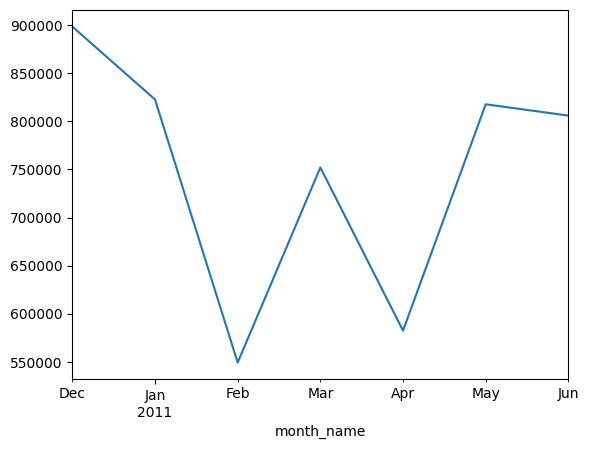

In [17]:
df_clean["invoicedate"] = pd.to_datetime(df_clean["invoicedate"])
df_clean["month_name"] = df_clean["invoicedate"].dt.to_period("M")

monthly_sales = df_clean.groupby("month_name")["totalsale"].sum()
monthly_sales.plot()
plt.show()


In [18]:
print(df.columns)

Index(['invoiceno', 'invoicedate', 'invoicetime', 'description', 'quantity',
       'unitprice', 'totalsale', 'price_satus', 'customerid', 'customer__type',
       'country', 'inovoce_month', 'year', 'month', 'month_name'],
      dtype='object')


## Top Products by Revenue

In [19]:
top_products = (
    df_clean.groupby("description")["totalsale"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products


description
MEDIUM CERAMIC TOP STORAGE JAR        155986.86
AMAZON FEE                            145067.77
Manual                                124731.89
REGENCY CAKESTAND 3 TIER              112522.41
DOTCOM POSTAGE                         89835.27
WHITE HANGING HEART T-LIGHT HOLDER     69770.77
PARTY BUNTING                          59760.41
POSTAGE                                49975.19
JUMBO BAG RED RETROSPOT                43898.06
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: totalsale, dtype: float64

## Purchase Frequency

In [20]:
purchase_freq = (
    df_clean.groupby("customerid")["invoiceno"]
    .nunique()
    .sort_values(ascending=False)
)
purchase_freq


customerid
12748.0    106
14911.0     93
14606.0     77
17841.0     75
13089.0     71
          ... 
15174.0      1
15167.0      1
15165.0      1
15163.0      1
18287.0      1
Name: invoiceno, Length: 2996, dtype: int64